Import the packages.

In [28]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score

Read in the data and extract features from labels. 

In [29]:
df = pd.read_csv('./Data/munged_df.csv', index_col='account_id')
# df = pd.read_csv('./Data/vif_pruned_df.csv', index_col='account_id')
feature_cols = list(df.columns[:-1])
target_col = df.columns[-1] 
X_all = df[feature_cols]
y_all = df[target_col] 

In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_all = scaler.fit_transform(X_all)

In [31]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all , 
                                                    y_all, 
                                                    stratify=y_all,
                                                    test_size=0.5, 
                                                    random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8303 samples.
Testing set has 8304 samples.


In [32]:
clf = svm.OneClassSVM(                 \
                    cache_size=200, 
                    coef0=0.0,
                    degree=3, 
                    gamma=10.0, 
                    kernel='linear',
                    max_iter=-1, 
                    random_state=1, 
                    shrinking=True,
                    tol=0.001, 
                    verbose=False \
                     )

In [33]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [34]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

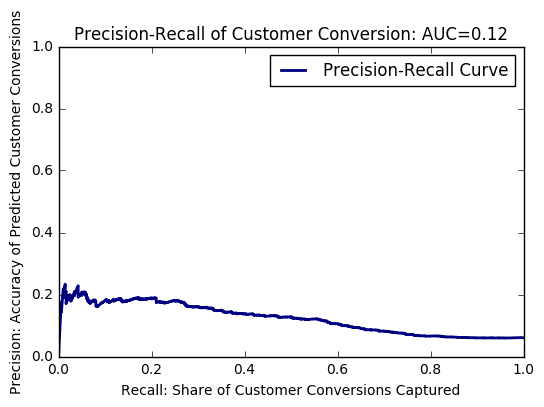

In [35]:
plt.clf()
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('Precision-Recall of Customer Conversion: AUC={0:0.2f}'.format(average_precision))
plt.show()
# path = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
#        'Capstone_Project/Images'
# savepath = os.path.join(path, 'exploratory_analysis-feature_means.png')
# plt.savefig(savepath)
# plt.clf()